In [1]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

In [3]:
MY_API_TOKEN = 'eda22ec38f81a3f8bea973c9355c422d15824bb570d5044749f90c5a9d3f3ed7f5b15970fa374ef750355b4fe9402ec7f8f37cc7325920906f8c4f185e42f663'
IBMQ.save_account(MY_API_TOKEN)

IBMQ.load_account()

<ipython-input-3-e675380077ad>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(MY_API_TOKEN)
<ipython-input-3-e675380077ad>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(MY_API_TOKEN)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

<ipython-input-9-20a27f617be2>:25: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend, shots=1000)


{'10': 1000}


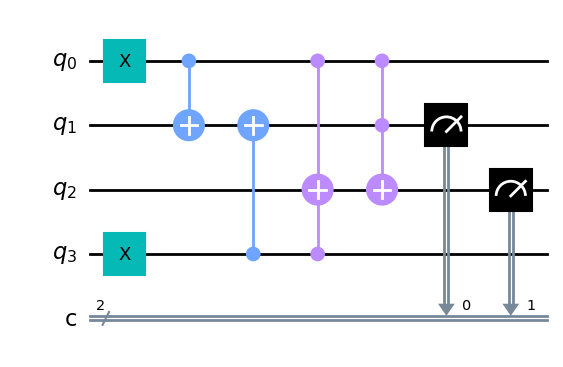

In [9]:
q = QuantumRegister(4, 'q') # init qbits
c = ClassicalRegister(2, 'c') # init registers
qc = QuantumCircuit(q, c)

# A = 1, B = 0, X (carry in) = 1
qc.x(q[0])
qc.x(q[3])

# sum
qc.cx(q[0], q[1])
qc.cx(q[3], q[1])

# rule transfer
qc.ccx(q[0], q[3], q[2])
qc.ccx(q[0], q[1], q[2])

qc.measure(q[1], c[0])
qc.measure(q[2], c[1])

# Выполнение на симуляторе
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

# Визуализация схемы
qc.draw(output='mpl')
